<a href="https://colab.research.google.com/github/SanghunOh/with_data_analytics/blob/main/codes/%EC%84%9C%EC%9A%B8_%EC%97%B4%EB%8C%80%EC%95%BC_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Connect google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path_root = '/content/drive/MyDrive/datas/'

# 작업 경로 설정
import os
os.chdir(path_root)
!pwd

/content/drive/.shortcut-targets-by-id/1tHYgEz3lQF-LmtFPXRgMBDh4UN54qeAs/datas


In [3]:
import glob

filename_list = []
for file_name in glob.glob("./OBS_ASOS_DD_2012_2021.csv"):
    filename_list.append(file_name)
filename_list

['./OBS_ASOS_DD_2012_2021.csv']

##read csv from files and concat DataFrammes

In [4]:
import pandas as pd

In [5]:
df_csv_list = list()
for file_name in filename_list:
  df_csv_list.append(pd.read_csv(file_name, encoding='cp949'))

df_concat = pd.concat(df_csv_list)
# df_concat

In [6]:
# show all rows
# pd.options.display.max_rows = df_concat.shape[0]
df_concat

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi)
0,90,속초,2012-01-01,1.1,-1.5,719.0,4.9,1031.0
1,90,속초,2012-01-02,-0.3,-2.9,827.0,4.0,1236.0
2,90,속초,2012-01-03,-0.8,-4.2,357.0,3.7,1237.0
3,90,속초,2012-01-04,-2.6,-5.6,517.0,1.8,1451.0
4,90,속초,2012-01-05,-2.3,-5.8,429.0,2.8,1357.0
...,...,...,...,...,...,...,...,...
343867,295,남해,2021-12-27,-0.8,-8.0,333.0,3.9,1452.0
343868,295,남해,2021-12-28,3.3,-2.5,536.0,8.7,1512.0
343869,295,남해,2021-12-29,5.8,0.7,235.0,10.6,1245.0
343870,295,남해,2021-12-30,3.4,1.2,2359.0,5.6,1428.0


In [7]:
df_concat.loc[0]

지점                       90
지점명                      속초
일시               2012-01-01
평균기온(°C)                1.1
최저기온(°C)               -1.5
최저기온 시각(hhmi)         719.0
최고기온(°C)                4.9
최고기온 시각(hhmi)        1031.0
Name: 0, dtype: object

###데이터타입으로 변경 : 일시 object

In [8]:
df_concat.columns, df_concat.dtypes

(Index(['지점', '지점명', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
        '최고기온 시각(hhmi)'],
       dtype='object'), 지점                 int64
 지점명               object
 일시                object
 평균기온(°C)         float64
 최저기온(°C)         float64
 최저기온 시각(hhmi)    float64
 최고기온(°C)         float64
 최고기온 시각(hhmi)    float64
 dtype: object)

In [9]:
df_concat['일시'] = pd.to_datetime(df_concat['일시'])
df_concat.dtypes

지점                        int64
지점명                      object
일시               datetime64[ns]
평균기온(°C)                float64
최저기온(°C)                float64
최저기온 시각(hhmi)           float64
최고기온(°C)                float64
최고기온 시각(hhmi)           float64
dtype: object

##EDA

In [10]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343872 entries, 0 to 343871
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   지점             343872 non-null  int64         
 1   지점명            343872 non-null  object        
 2   일시             343872 non-null  datetime64[ns]
 3   평균기온(°C)       343561 non-null  float64       
 4   최저기온(°C)       343851 non-null  float64       
 5   최저기온 시각(hhmi)  343859 non-null  float64       
 6   최고기온(°C)       343849 non-null  float64       
 7   최고기온 시각(hhmi)  343855 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 21.0+ MB


In [11]:
df_concat['지점명'].unique(), #df_concat['지점명'].nunique(), 

(array(['속초', '북춘천', '철원', '동두천', '파주', '대관령', '춘천', '백령도', '북강릉', '강릉',
        '동해', '서울', '인천', '원주', '울릉도', '수원', '영월', '충주', '서산', '울진', '청주',
        '대전', '추풍령', '안동', '상주', '포항', '군산', '대구', '전주', '울산', '창원', '광주',
        '부산', '통영', '목포', '여수', '흑산도', '완도', '고창', '순천', '진도(첨찰산)',
        '대구(기)', '홍성', '제주', '고산', '성산', '서귀포', '진주', '강화', '양평', '이천',
        '인제', '홍천', '태백', '정선군', '제천', '보은', '천안', '보령', '부여', '금산', '세종',
        '부안', '임실', '정읍', '남원', '장수', '고창군', '영광군', '김해시', '순창군', '북창원',
        '주암', '양산시', '보성군', '강진군', '장흥', '해남', '고흥', '의령군', '함양군', '광양시',
        '진도군', '봉화', '영주', '문경', '청송군', '영덕', '의성', '구미', '영천', '경주시',
        '거창', '합천', '밀양', '산청', '거제', '남해'], dtype=object),)

In [12]:
df_concat['일시'].dt.year.unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [13]:
df_concat['일시'].dt.year.value_counts().sort_index()

2012    33854
2013    33671
2014    34181
2015    34163
2016    34496
2017    34668
2018    34673
2019    34738
2020    34767
2021    34661
Name: 일시, dtype: int64

In [14]:
df_concat['지점명'].value_counts().sort_values()

주암        184
대구(기)     619
세종        946
북춘천      1918
홍성       2250
         ... 
영천       3653
경주시      3653
합천       3653
대전       3653
청주       3653
Name: 지점명, Length: 98, dtype: int64

##서울 열대야 분석


In [15]:
seoul_df = df_concat[df_concat['지점명']=='서울'].copy()
seoul_df.shape

(3653, 8)

In [16]:
seoul_df.isnull().sum()

지점               0
지점명              0
일시               0
평균기온(°C)         0
최저기온(°C)         0
최저기온 시각(hhmi)    0
최고기온(°C)         1
최고기온 시각(hhmi)    1
dtype: int64

###누락데이터 확인(1951, 1952년)

In [17]:
seoul_df['year'] = seoul_df['일시'].dt.year

In [18]:
seoul_df.reset_index(inplace=True)
seoul_df

,index,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),year
0,38448,108,서울,2012-01-01,-3.0,-6.9,2326.0,0.4,1.0,2012
1,38449,108,서울,2012-01-02,-4.8,-8.3,758.0,-1.2,1357.0,2012
2,38450,108,서울,2012-01-03,-4.5,-6.8,752.0,-0.2,1252.0,2012
3,38451,108,서울,2012-01-04,-7.4,-9.6,837.0,-4.3,1552.0,2012
4,38452,108,서울,2012-01-05,-5.7,-9.8,740.0,-1.3,1542.0,2012
...,...,...,...,...,...,...,...,...,...,...
3648,42096,108,서울,2021-12-27,-7.6,-12.9,123.0,-3.9,1634.0,2021
3649,42097,108,서울,2021-12-28,-4.1,-8.5,712.0,-0.9,1600.0,2021
3650,42098,108,서울,2021-12-29,0.4,-3.8,154.0,5.9,1518.0,2021
3651,42099,108,서울,2021-12-30,-3.9,-6.8,714.0,0.2,1531.0,2021


In [19]:
seoul_df['year'].value_counts().sort_index()

2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
Name: year, dtype: int64

In [20]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


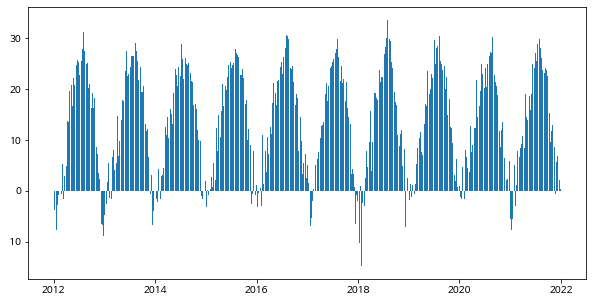

In [21]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(10,5))
plt.bar(seoul_df['일시'], seoul_df['평균기온(°C)'])
plt.show()

##서울 폭염 분석 : 최고 기온 33도 이상

In [22]:
seoul_hotday = seoul_df[seoul_df['최고기온(°C)'] >= 33].copy()
seoul_hotday

,index,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),year
170,38618,108,서울,2012-06-19,26.0,20.9,537.0,33.5,1331.0,2012
176,38624,108,서울,2012-06-25,26.5,22.2,519.0,33.2,1437.0,2012
209,38657,108,서울,2012-07-28,28.5,25.2,318.0,33.2,1559.0,2012
210,38658,108,서울,2012-07-29,29.2,26.2,233.0,33.2,1426.0,2012
212,38660,108,서울,2012-07-31,29.0,26.6,513.0,33.0,1522.0,2012
...,...,...,...,...,...,...,...,...,...,...
3498,41946,108,서울,2021-07-30,30.5,25.8,559.0,35.4,1406.0,2021
3499,41947,108,서울,2021-07-31,29.8,26.8,538.0,34.3,1457.0,2021
3503,41951,108,서울,2021-08-04,28.9,26.3,532.0,33.2,1426.0,2021
3504,41952,108,서울,2021-08-05,29.4,25.6,407.0,33.7,1511.0,2021


###폭염 그래프

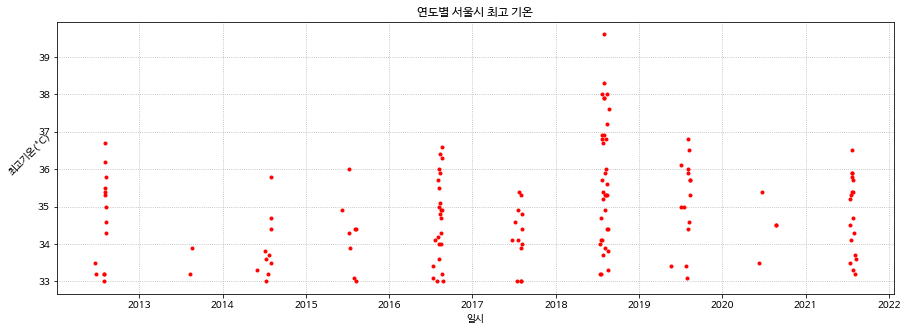

In [23]:
plt.rcParams['figure.figsize'] = (15,5)
plt.plot(seoul_hotday['일시'], seoul_hotday['최고기온(°C)'], 'r.')
plt.xlabel('일시')
plt.ylabel('최고기온(°C)', rotation=45)
# plt.xticks(range(1945,1964, 1), rotation=45)
plt.grid(ls=':')
plt.title('연도별 서울시 최고 기온')
plt.show()

###열대야 그래프

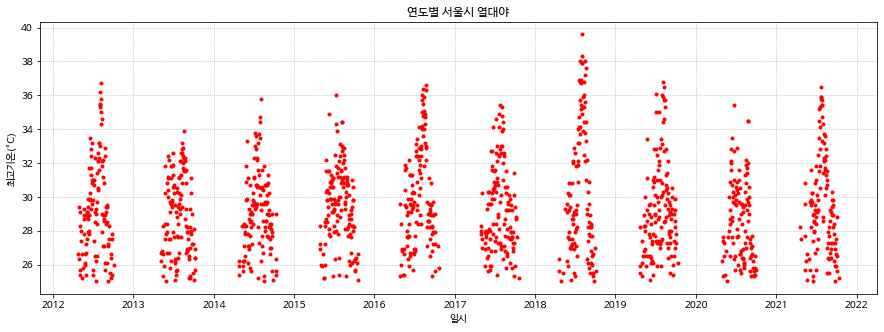

In [24]:
seoul_hotnight = seoul_df[seoul_df['최고기온(°C)'] >= 25].copy()
plt.plot(seoul_hotnight['일시'], seoul_hotnight['최고기온(°C)'], 'r.')
plt.xlabel('일시')
plt.ylabel('최고기온(°C)')
plt.grid(ls=':')
plt.title('연도별 서울시 열대야')
plt.show()

##Best 10 : 폭염, 열대야 

In [39]:
seoul_hotday_best = seoul_hotday.nlargest(10, '최고기온(°C)')
seoul_hotday_best

,index,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),year
2404,40852,108,서울,2018-08-01,33.6,27.8,556.0,39.6,1536.0,2018
2403,40851,108,서울,2018-07-31,32.6,27.8,604.0,38.3,1519.0,2018
2394,40842,108,서울,2018-07-22,31.8,25.3,536.0,38.0,1527.0,2018
2418,40866,108,서울,2018-08-15,31.7,28.3,608.0,38.0,1417.0,2018
2405,40853,108,서울,2018-08-02,33.7,30.3,607.0,37.9,1558.0,2018
2406,40854,108,서울,2018-08-03,33.1,30.0,2342.0,37.9,1415.0,2018
2425,40873,108,서울,2018-08-22,30.7,23.4,453.0,37.6,1608.0,2018
2417,40865,108,서울,2018-08-14,31.7,27.7,608.0,37.2,1456.0,2018
2393,40841,108,서울,2018-07-21,30.6,24.9,524.0,36.9,1548.0,2018
2402,40850,108,서울,2018-07-30,31.7,26.2,529.0,36.9,1624.0,2018


###날짜별 확인

In [34]:
# seoul_hotday_best.loc[:,'일시']

2404   2018-08-01
2403   2018-07-31
2394   2018-07-22
2418   2018-08-15
2405   2018-08-02
2406   2018-08-03
2425   2018-08-22
2417   2018-08-14
2393   2018-07-21
2402   2018-07-30
Name: 일시, dtype: datetime64[ns]

In [42]:
seoul_hotday_bestest = seoul_hotday_best.iloc[[0]]
seoul_hotday_bestest

,index,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),year
2404,40852,108,서울,2018-08-01,33.6,27.8,556.0,39.6,1536.0,2018


In [45]:
seoul_hotday_bestest_day = seoul_hotday_bestest.iloc[0,3].date()
seoul_hotday_bestest_temporate = seoul_hotday_bestest.iloc[0,7]
seoul_hotday_bestest_day, seoul_hotday_bestest_temporate

(datetime.date(2018, 8, 1), 39.6)

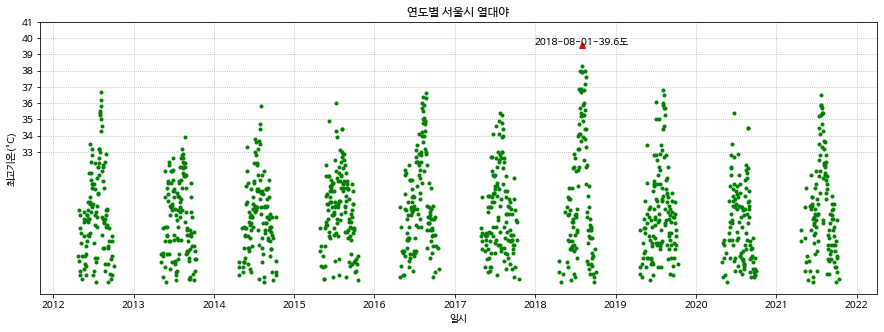

In [56]:
# 열대야 그래프 사용
seoul_hotnight = seoul_df[seoul_df['최고기온(°C)'] >= 25].copy()
plt.plot(seoul_hotnight['일시'], seoul_hotnight['최고기온(°C)'], 'g.')
plt.xlabel('일시')
plt.ylabel('최고기온(°C)')
plt.grid(ls=':')
plt.title('연도별 서울시 열대야')

plt.plot(seoul_hotday_bestest_day, seoul_hotday_bestest_temporate, 'r^')
bestest_text = '{0}-{1:.1f}도'.format(seoul_hotday_bestest_day, seoul_hotday_bestest_temporate)
plt.text(seoul_hotday_bestest_day, seoul_hotday_bestest_temporate,bestest_text, ha='center')
plt.yticks(range(33,42))
plt.show()